# Different experiments with the dataset

## Table of Contents
- [Different experiments with the dataset](#different-experiments-with-the-dataset)
  - [Most frequent words before custom tokenization](#most-frequent-words-before-custom-tokenization)
  - [Custom vocabulary](#custom-vocabulary)
  - [Most frequent words after custom tokenization](#most-frequent-words-after-custom-tokenization)
  - [Most frequent bigrams](#most-frequent-bigrams)
  - [680 custom vocab](#680-custom-vocab)
  - [Spell Check](#spell-check)
  - [Plurals](#plurals)
    - [Using `inflect` package](#using-inflect-package)
    - [Using `nltk` and `pattern-en` package](#using-nltk-and-pattern-en-package)
  - [Workflow for spell check and plurals](#workflow-for-spell-check-and-plurals)


This notebook contains various experiement with custom vocabulary, spell checking, handling of plurals etc. in preparation for the final modeling and evaluation done in the `04-Modeliing-Final` notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.feature_extraction.text import CountVectorizer

# custom tokenizer (moved to a separate module due to Streamlit requirements)
import cust_tokenizer


In [ ]:
df = pd.read_csv('../data/interim/full_recipes_cleaned_2.csv')
df.shape

In [3]:
df.set_index('recipeId')

,calories,rating,title,directionsStr,categoriesStr,ingredientsStr
recipeId,,,,,,
0,426.0,2.500,"Lentil, Apple, and Turkey Wrap","['1. Place the stock, lentils, celery, carrot,...","['Sandwich', 'Bean', 'Fruit', 'Tomato', 'turke...",['4 cups low-sodium vegetable or chicken stock...
1,403.0,4.375,Boudin Blanc Terrine with Red Onion Confit,['Combine first 9 ingredients in heavy medium ...,"['Food Processor', 'Onion', 'Pork', 'Bake', 'B...","['1 1/2 cups whipping cream', '2 medium onions..."
2,165.0,3.750,Potato and Fennel Soup Hodge,['In a large heavy saucepan cook diced fennel ...,"['Soup/Stew', 'Dairy', 'Potato', 'Vegetable', ...","['1 fennel bulb (sometimes called anise), stal..."
4,547.0,3.125,Spinach Noodle Casserole,['Preheat oven to 350°F. Lightly grease 8x8x2-...,"['Cheese', 'Dairy', 'Pasta', 'Vegetable', 'Sid...","['1 12-ounce package frozen spinach soufflé, t..."
5,948.0,4.375,The Best Blts,"['Mix basil, mayonnaise and butter in processo...","['Sandwich', 'Food Processor', 'Tomato', 'Kid-...",['2 1/2 cups (lightly packed) fresh basil leav...
...,...,...,...,...,...,...
20125,28.0,3.125,Parmesan Puffs,['Beat whites in a bowl with an electric mixer...,"['Mixer', 'Cheese', 'Egg', 'Fry', 'Cocktail Pa...","['2 large egg whites', '3 oz Parmigiano-Reggia..."
20126,671.0,4.375,Artichoke and Parmesan Risotto,['Bring broth to simmer in saucepan.Remove fro...,"['Side', 'Kid-Friendly', 'High Fiber', 'Dinner...",['5 1/2 cups (or more) low-salt chicken broth'...
20127,563.0,4.375,Turkey Cream Puff Pie,"['Using a sharp knife, cut a shallow X in bott...","['Onion', 'Poultry', 'turkey', 'Vegetable', 'B...","['1 small tomato', '1 small onion, finely chop..."


In [4]:
# confirm that there are no null values or duplicated values
print(f"Null values: {df.isna().sum().sum()}")
print(f"Duplicated rows: {df.duplicated().sum()}")

Null values: 0
Duplicated rows: 0


## Most frequent words before custom tokenization

[('cup', 33102), ('tablespoons', 19371), ('teaspoon', 17657), ('chopped', 15403), ('fresh', 14436), ('cups', 13052), ('large', 8659), ('oil', 8604), ('tablespoon', 8589), ('salt', 8585)]


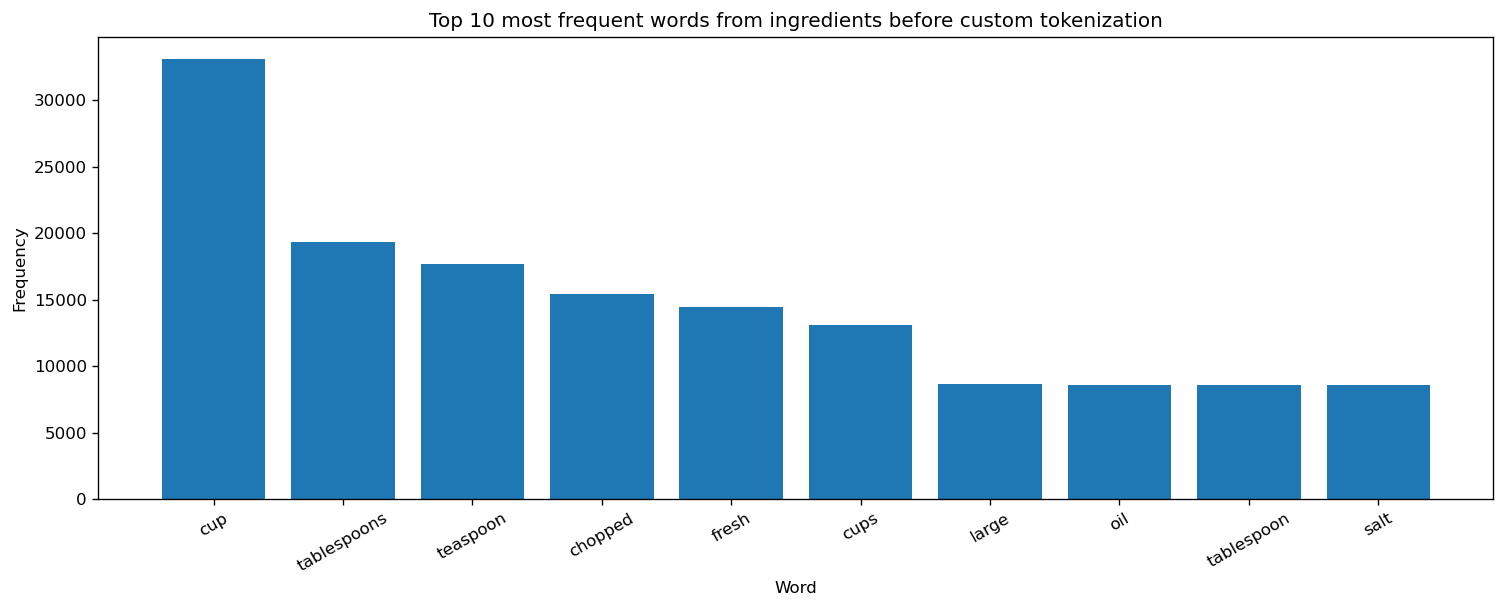

In [8]:
# Just to get a visual of using the default tokenizer
from sklearn.feature_extraction.text import CountVectorizer

vect_temp = CountVectorizer(stop_words='english',
                       min_df=5)
temp = vect_temp.fit_transform(df['ingredientsStr'])

sum_words_temp = temp.sum(axis = 0)
words_freq_temp = [(word_temp, sum_words_temp[0, i]) for word_temp, i in vect_temp.vocabulary_.items()]
words_freq_temp = sorted(words_freq_temp, key = lambda x: x[1], reverse = True)
print(words_freq_temp[0:10])

ingredient_temp = list(zip(*words_freq_temp[0:10]))[0]
frequency_temp = list(zip(*words_freq_temp[0:10]))[1]
x_pos = np.arange(len(ingredient_temp))

plt.figure(figsize=(15,5), dpi=120)
plt.bar(x_pos, frequency_temp,align='center')
plt.xticks(x_pos, ingredient_temp, rotation=30)
plt.ylabel('Frequency')
plt.xlabel('Word')
plt.title('Top 10 most frequent words from ingredients before custom tokenization')
plt.savefig("top10_beforeCustom.png")

## Custom vocabulary

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer=(cust_tokenizer.my_tokenizer),
                       min_df=5)
ingredients_matrix = vectorizer.fit_transform(df['ingredientsStr'])


c:\Users\anami\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [10]:
# now we have the vocabulary
print(type(vectorizer.vocabulary_))
print(vectorizer.vocabulary_)
print(len(vectorizer.vocabulary_))
print(type(vectorizer.get_feature_names_out()))
print(len(vectorizer.get_feature_names_out()))

<class 'dict'>
{'lowsodium': 1152, 'vegetable': 2072, 'chicken': 333, 'stock': 1967, 'brown': 210, 'lentils': 1100, 'french': 760, 'green': 858, 'celery': 303, 'carrot': 285, 'sprig': 1947, 'thyme': 2028, 'kosher': 1055, 'salt': 1752, 'tomato': 2041, 'cored': 449, 'seeded': 1803, 'diced': 576, 'fuji': 776, 'apple': 37, 'freshly': 764, 'lemon': 1092, 'juice': 1012, 'extravirgin': 667, 'olive': 1361, 'oil': 1354, 'pepper': 1460, 'taste': 2013, 'sheets': 1844, 'wholewheat': 2116, 'lavash': 1073, 'half': 885, 'crosswise': 494, 'flour': 734, 'tortillas': 2046, 'turkey': 2061, 'breast': 193, 'head': 910, 'bibb': 109, 'lettuce': 1101, 'whipping': 2102, 'cream': 478, 'onions': 1365, 'bay': 81, 'leaves': 1081, 'cloves': 389, 'garlic': 788, 'clove': 387, 'nutmeg': 1345, 'shallots': 1829, 'butter': 235, 'boneless': 157, 'center': 305, 'pork': 1546, 'loin': 1139, 'sinew': 1877, 'chunks': 369, 'chilled': 345, 'eggs': 633, 'purpose': 1601, 'tawny': 2014, 'port': 1547, 'currants': 525, 'peppercorns':

In [11]:
def printMostFrequentWords():
    # this function will sort the vocab and print the 50 most frequent words
    sum_words = ingredients_matrix.sum(axis = 0)
    words_freq = [(word, sum_words[0, i]) for word, i in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    # comment the above line and uncomment below to see least frequent words
    # words_freq = sorted(words_freq, key = lambda x: x[1])
    print(words_freq[0:50])
    return words_freq[0:10]

# call the function
printMostFrequentWords()

[('oil', 8486), ('salt', 7708), ('sugar', 7120), ('butter', 5576), ('olive', 5399), ('pepper', 5304), ('juice', 5078), ('garlic', 4726), ('lemon', 4256), ('red', 3793), ('cream', 3782), ('cloves', 3344), ('leaves', 3307), ('flour', 3239), ('onion', 3045), ('pieces', 2991), ('chicken', 2817), ('vinegar', 2649), ('freshly', 2598), ('stick', 2481), ('cheese', 2456), ('vegetable', 2445), ('green', 2260), ('dry', 2244), ('wine', 2231), ('packed', 2228), ('coarsely', 2131), ('egg', 2109), ('parsley', 2058), ('kosher', 2042), ('slices', 2030), ('sauce', 2013), ('halved', 1988), ('eggs', 1971), ('broth', 1899), ('powder', 1843), ('orange', 1823), ('vanilla', 1804), ('tomatoes', 1734), ('seeds', 1710), ('milk', 1668), ('lime', 1640), ('onions', 1618), ('drained', 1570), ('extravirgin', 1519), ('thyme', 1477), ('allpurpose', 1466), ('ginger', 1401), ('brown', 1366), ('lengthwise', 1351)]


[('oil', 8486),
 ('salt', 7708),
 ('sugar', 7120),
 ('butter', 5576),
 ('olive', 5399),
 ('pepper', 5304),
 ('juice', 5078),
 ('garlic', 4726),
 ('lemon', 4256),
 ('red', 3793)]

## Most frequent words after custom tokenization

[('oil', 8486), ('salt', 7708), ('sugar', 7120), ('butter', 5576), ('olive', 5399), ('pepper', 5304), ('juice', 5078), ('garlic', 4726), ('lemon', 4256), ('red', 3793), ('cream', 3782), ('cloves', 3344), ('leaves', 3307), ('flour', 3239), ('onion', 3045), ('pieces', 2991), ('chicken', 2817), ('vinegar', 2649), ('freshly', 2598), ('stick', 2481), ('cheese', 2456), ('vegetable', 2445), ('green', 2260), ('dry', 2244), ('wine', 2231), ('packed', 2228), ('coarsely', 2131), ('egg', 2109), ('parsley', 2058), ('kosher', 2042), ('slices', 2030), ('sauce', 2013), ('halved', 1988), ('eggs', 1971), ('broth', 1899), ('powder', 1843), ('orange', 1823), ('vanilla', 1804), ('tomatoes', 1734), ('seeds', 1710), ('milk', 1668), ('lime', 1640), ('onions', 1618), ('drained', 1570), ('extravirgin', 1519), ('thyme', 1477), ('allpurpose', 1466), ('ginger', 1401), ('brown', 1366), ('lengthwise', 1351)]


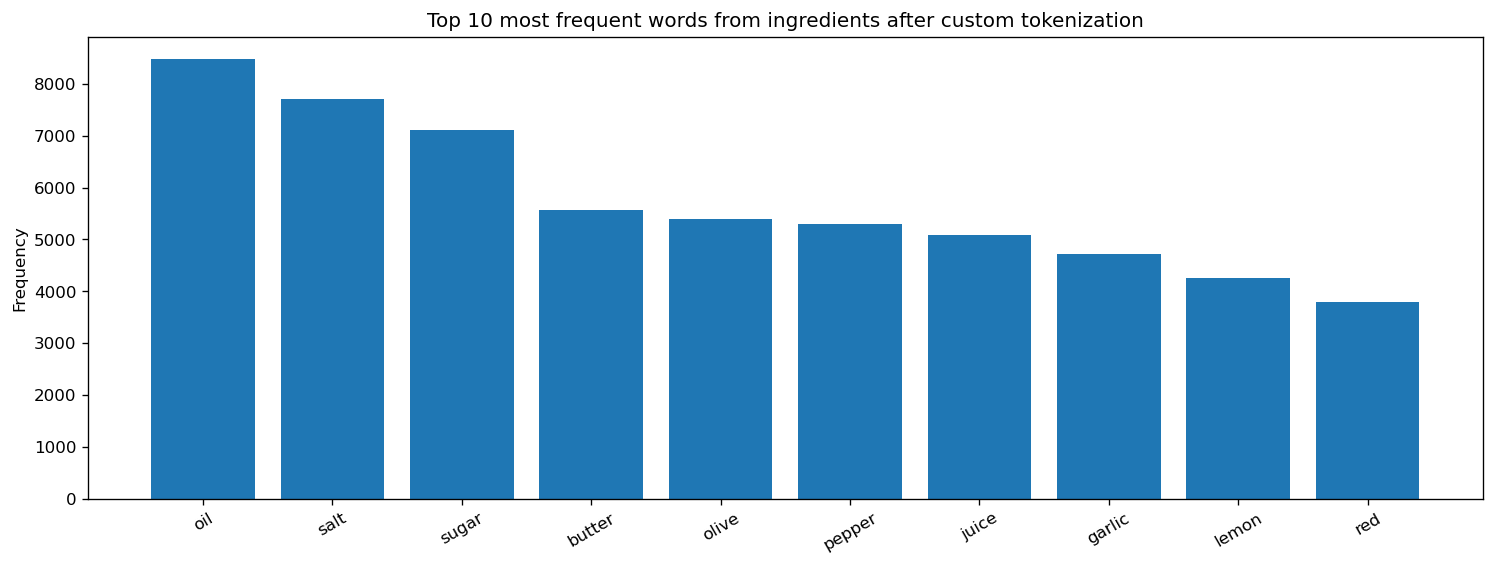

In [13]:
top_10 = printMostFrequentWords()
ingredient = list(zip(*top_10))[0]
frequency = list(zip(*top_10))[1]
x_pos = np.arange(len(ingredient))

plt.figure(figsize=(15,5), dpi=120)
plt.bar(x_pos, frequency,align='center')
plt.xticks(x_pos, ingredient, rotation=30)
plt.ylabel('Frequency')
plt.title('Top 10 most frequent words from ingredients after custom tokenization')
plt.savefig("top10After.png")

In [8]:
# save the vocab to a file
# with open("ingvect", "w") as outfile:
#     outfile.write("\n".join(vectorizer.get_feature_names_out()))

In [9]:
# # TODO: THIS STEP IS MANUAL, DO IT PROGRAMATICALLY
# # Load the updated vocab to a list
# new_vocab_list = None
# with open('ingvect_mod') as f:
#     new_vocab_list = f.read().splitlines()
# len(new_vocab_list)

In [10]:
new_vocab_list = list(vectorizer.get_feature_names_out())
new_vocab_list.append("Peanut butter")
len(new_vocab_list)

2161

In [11]:
# Let's set this new vocab as a hyperparameter of the vectorizer
vectorizer_mod = CountVectorizer(tokenizer=(cust_tokenizer.my_tokenizer),
                       min_df=5, vocabulary=new_vocab_list)
# not calling fit because sending custom vocab..
ingredients_matrix_mod = vectorizer_mod.transform(df['ingredientsStr'])


In [12]:
# Adding a function to print the list of ingredients given a recipe title
def printIngredients(recipeName):
    sel = df['title'] == recipeName
    print(recipeName)
    print(df.loc[sel, ['ingredientsStr']].values)


In [13]:
# from sklearn.neighbors import NearestNeighbors

# model = NearestNeighbors(n_neighbors=11, metric='cosine')
# model.fit(ingredients_matrix)



In [14]:
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(n_neighbors=11, metric='cosine')
model.fit(ingredients_matrix_mod)

NearestNeighbors(metric='cosine', n_neighbors=11)

In [15]:
# Using various ingredient lists to test the results

ingInputList = [
    # "Chicken, Parmesan, Breadcrumbs",  # something familiar
    # "Artichoke Pesto",
    # "Chicken thighs, potatoes",  # compare results of potatoes vs potato
    # "Chicken thighs, potato",
    # "Okra",  # single ingredient
    # "Bhindi",  # unknown ingredient - does not exist in the vocabulary
    "Peanut butter"  # This is a 2 word ingredient
]

for ingInput in ingInputList:
    print(f"\n Input ingredients: {ingInput}")
    # Convert the string to a series
    ingInputSeries = pd.Series(ingInput)

    # Let's try to use the vectorizer on this
    ingTransformed = vectorizer_mod.transform(ingInputSeries)

    # pass this to NearestNeighbors trained model
    distOfRes, indicesOfRes = model.kneighbors(ingTransformed)

    # print the output
    print("\n Result")

    for i in range(0, 11):  # TODO: 11 should be made configurable and match the n-neighbors number
        name = df.loc[indicesOfRes[0][i], ['title']].values[0]
        distance = (distOfRes[0][i]).round(3)
        rating = df.loc[indicesOfRes[0][i], ['rating']].values[0]

        # print(f"{name}  :  {distance}")
        print(f"{name}  :  {distance}  :  {rating}")



 Input ingredients: Peanut butter

 Result
To Clarify Butter  :  0.293  :  5.0
Peanut Butter and Banana Sandwiches  :  0.36  :  3.75
Peanut Butter Cheesecake with Peanut Brittle  :  0.411  :  3.75
Peanut Butter and Jelly Layered Sandwiches  :  0.423  :  4.375
Peanut Punch  :  0.423  :  0.0
Peanut Butter, Banana, and Jelly "Ice Cream"  :  0.465  :  0.0
Shallot Butter  :  0.5  :  5.0
Whole-Wheat Peanut Butter Waffles  :  0.513  :  3.75
Milk Chocolate Peanut Butter Sauce  :  0.513  :  2.5
Easy Crepes  :  0.529  :  5.0
Peanut Butter Chocolate Ripple Ice Cream  :  0.529  :  4.375


In [16]:
printIngredients("To Clarify Butter")
printIngredients("Peanut Punch")

To Clarify Butter
[["['Unsalted butter']"]]
Peanut Punch
[["['2 tablespoons cornstarch', '1/2 cup water', '2 cups milk', '6 tablespoons peanut butter', 'Sugar to taste']"]]


In [17]:
recipe_index = df[df['title'] == 'To Clarify Butter'].index
ingredients_matrix_mod[recipe_index].sum(axis=1)

matrix([[1]], dtype=int64)

## Most frequent bigrams

In [ ]:
# Get bigrams out and see the most common ones
from sklearn.feature_extraction.text import CountVectorizer

vect_bg = CountVectorizer(tokenizer=(cust_tokenizer.my_tokenizer),
                       min_df=5, ngram_range=(2,2))
ing_bg_mat = vect_bg.fit_transform(df['ingredientsStr'])

In [ ]:
def printMostFrequentBigrams():
    # this function will sort the vocab and print the 50 most frequent words
    sum_words = ing_bg_mat.sum(axis = 0)
    words_freq = [(word, sum_words[0, i]) for word, i in vect_bg.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    # comment the above line and uncomment below to see least frequent words
    # words_freq = sorted(words_freq, key = lambda x: x[1])
    print(words_freq[0:50])

# call the function
printMostFrequentBigrams()

In [20]:
vect_bg.vocabulary_['peanut butter']

6035

In [21]:
vect_bg.vocabulary_['olive oil']

5462

In [22]:
# sorted_vocab = sorted(vect_bg.vocabulary_.values(), reverse=True)
sorted_vocab = sorted(vect_bg.vocabulary_.items(), key=lambda x:x[1], reverse=True)

In [ ]:
sorted_vocab[51:100]

Selecting common bigrams

chicken broth  
bell pepper  
soy sauce  

Not necessary to specify them actually. 


## 680 custom vocab

In [ ]:
vocab_680 = None
with open('ing680') as f:
    vocab_680 = f.read().splitlines()
len(vocab_680)

In [ ]:
# Let's set this new vocab as a hyperparameter of the vectorizer
vect_680 = CountVectorizer(tokenizer=(cust_tokenizer.my_tokenizer),
                       min_df=5, vocabulary=vocab_680)
# not calling fit because sending custom vocab..
ingredients_matrix_680 = vect_680.transform(df['ingredientsStr'])

from sklearn.neighbors import NearestNeighbors

model_680 = NearestNeighbors(n_neighbors=11, metric='cosine')
model_680.fit(ingredients_matrix_680)

In [ ]:
# Using various ingredient lists to test the results

ingInputList = [
    "Chicken, Parmesan, Breadcrumbs",  # something familiar
    "Artichoke Pesto",
    "Chicken thighs, potatoes",  # compare results of potatoes vs potato
    "Chicken thighs, potato",
    "Okra",  # single ingredient
    "Bhindi",  # unknown ingredient - does not exist in the vocabulary
    "Peanut butter"  # This is a 2 word ingredient
]

for ingInput in ingInputList:
    print(f"\n Input ingredients: {ingInput}")
    # Convert the string to a series
    ingInputSeries = pd.Series(ingInput)

    # Let's try to use the vectorizer on this
    ingTransformed = vect_680.transform(ingInputSeries)

    # pass this to NearestNeighbors trained model
    distOfRes, indicesOfRes = model_680.kneighbors(ingTransformed)

    # print the output
    print("\n Result")

    for i in range(0, 11):  # TODO: 11 should be made configurable and match the n-neighbors number
        name = df.loc[indicesOfRes[0][i], ['title']].values[0]
        distance = (distOfRes[0][i]).round(3)
        rating = df.loc[indicesOfRes[0][i], ['rating']].values[0]

        # print(f"{name}  :  {distance}")
        print(f"{name}  :  {distance}  :  {rating}")


In [ ]:
printIngredients("Sorrel, Pea, and Leek Soup")

## Spell Check

In [26]:
# spell checker - https://www.geeksforgeeks.org/correcting-words-using-nltk-in-python/
# importing the nltk suite
import nltk

# importing jaccard distance
# and ngrams from nltk.util
from nltk.metrics.distance import jaccard_distance
from nltk.util import ngrams

correct_words = vectorizer.get_feature_names_out()

# that need to be corrected
incorrect_words=['brocolli', 'mozarela', 'cheese', 'ladyfinger', 'brinjal', 'tomatoe', 'potatoes',
'tomatoe','fish','egg','octopuses','oyster','fetas']

# loop for finding correct spellings
# based on jaccard distance
# and printing the correct word
for word in incorrect_words:
    temp = [(jaccard_distance(set(ngrams(word, 2)),
                              set(ngrams(w, 2))),w)
            for w in correct_words if w[0]==word[0]]
    print(sorted(temp, key = lambda val:val[0])[0][1])

broccoli
mozzarella
cheese
ladyfingers
brine
tomatoes
potatoes
tomatoes
fish
egg
octopus
oyster
feta


In [28]:
# spell checker - https://www.geeksforgeeks.org/correcting-words-using-nltk-in-python/
# importing the nltk suite
import nltk

# importing jaccard distance
# and ngrams from nltk.util
from nltk.metrics.distance import jaccard_distance
from nltk.util import ngrams

correct_words = vectorizer.get_feature_names_out() # or just put vocab variable here

# that need to be corrected
# incorrect_words=['brocolli', 'mozarela', 'cheese', 'ladyfinger', 'brinjal', 'tomatoe', 'potatoes','fish','egg','octopi','oyster','fetas']
incorrect_words = ['tomato', 'oysterss', 'potato', 'octopodes', 'fetas', 'eggss', 'oyster', 'octopu', 'tomatoess', 'egg', 'potatoes', 'fetum', 'fish']
# incorrect_words=['fetas']
# incorrect_words=['cheese']

# loop for finding correct spellings
# based on jaccard distance
# and printing the correct word

final_words = []
for word in incorrect_words:
    temp = [(jaccard_distance(set(ngrams(word, 2)),
                              set(ngrams(w, 2))),w)
            for w in correct_words if w[0]==word[0]]
    sorted_temp = sorted(temp, key = lambda val:val[0])
    word_distance = sorted_temp[0][0]
    corrected_word = sorted_temp[0][1]
    # print(word_distance)
    # print(corrected_word)
    if word_distance > 0.5:
        print(f"Sorry we could not find recipes with the ingredient {word}")
    else:
        final_words.append(corrected_word)
print(final_words)
    # print(sorted(temp, key = lambda val:val[0])[0][1])

Sorry we could not find recipes with the ingredient octopodes
Sorry we could not find recipes with the ingredient fetum
['tomato', 'oysters', 'potato', 'feta', 'eggs', 'oyster', 'octopus', 'tomatoes', 'egg', 'potatoes', 'fish']


words = ["potato", "tomatoes", "fish", "eggs", "octopus", "oysters", "feta"]

I like the way the nltk works better than inflect even if it requires more setup.

## Plurals

### Using `inflect` package

In [ ]:
# plurals
# %pip install inflect


In [ ]:
import inflect

p = inflect.engine()
res = []
words = ["potato", "tomatoes", "fish", "eggs", "octopus", "oysters", "feta"]
for word in words:
    print(p.plural(word))

potatoes
tomatoe
fish
egg
octopuses
oyster
fetas


### Using `nltk` and `pattern-en` package

In [ ]:
# %pip install pattern

In [ ]:
# Python program to pluralize a given
# word using pattern-en package

# Import the NLTK module
from pattern.en import pluralize
from pattern.en import singularize
import nltk

# Installing NLTK data to import
# and run en module of pattern
nltk.download('popular')

# Importing the pattern en module



In [ ]:
# Define the word and make it plural
# by using pluralize() function
print(pluralize('child'))

children


In [ ]:
words = ["potato", "tomatoes", "fish", "eggs", "octopus", "oysters", "feta"]
res1 = []
for word in words:
    # print(pluralize(word))
    res1.append(pluralize(word))
    res1.append(singularize(word))
print(set(res1))

{'tomato', 'oysterss', 'potato', 'octopodes', 'fetas', 'eggss', 'oyster', 'octopu', 'tomatoess', 'egg', 'potatoes', 'fetum', 'fish'}


## Workflow for spell check and plurals

1. User enters list of ingredients to include and exclude
2. Call the spell checker, and correct the ingredients, print a message if an ingredient is not found. Can add a flag to check where the list is from and print to screen or not.
3. From the corrected ingredients, singularize and pluralize everything, and make a set.
4. Run this once more through the spell checker, to elimiate bad pluralization / singularization
5. Now the list is ready to be vectorized, and sent to the model.

In [ ]:
# Including ingredients only
yes_ing_series = pd.Series("Okra")
yes_ing_tx = vectorizer.transform(yes_ing_series)

distOfRes, indicesOfRes = model.kneighbors(yes_ing_tx)

# print the output
print("\n Result")

for i in range(0, 11):  # TODO: 11 should be made configurable and match the n-neighbors number
    name = df.loc[indicesOfRes[0][i], ['title']].values[0]
    distance = (distOfRes[0][i]).round(3)
    rating = df.loc[indicesOfRes[0][i], ['rating']].values[0]

    print(f"{name}  :  {distance}")
    # print(f"{name}  :  {distance}  :  {rating}")

In [ ]:
# Including and excluding ingredients
yes_ing_series = pd.Series("Okra")
no_ing_series = pd.Series("Tomato Cilantro")

yes_ing_tx = vectorizer.transform(yes_ing_series)
no_ing_tx = (vectorizer.transform(no_ing_series)) * -1

updated_ing_tx = yes_ing_tx + no_ing_tx

distOfRes, indicesOfRes = model.kneighbors(updated_ing_tx)

# print the output
print("\n Result")

for i in range(0, 11):  # TODO: 11 should be made configurable and match the n-neighbors number
    name = df.loc[indicesOfRes[0][i], ['title']].values[0]
    distance = (distOfRes[0][i]).round(3)
    rating = df.loc[indicesOfRes[0][i], ['rating']].values[0]

    print(f"{name}  :  {distance}")
    # print(f"{name}  :  {distance}  :  {rating}")


 Result
Okra with Scallion, Lime, and Ginger  :  0.826
Chicken, Sausage, and Okra Gumbo  :  0.83
Broiled Tomato, Corn, and Okra  :  0.846
Stewed Corn and Tomatoes with Okra  :  0.864
Creole Chicken and Okra Gumbo  :  0.88
Succotash  :  0.885
Catfish and Okra with Pecan Butter Sauce  :  0.898
Crisp Okra in Yogurt Sauce  :  0.898
Chive Shortcakes with Smoky Corn and Okra Stew  :  0.902
Corn and Okra Stew  :  0.905
Spicy Gumbo-Laya  :  0.909


In [ ]:
import nltk
print('The nltk version is {}.'.format(nltk.__version__))

The nltk version is 3.8.1.
